In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = "retina"

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import matplotlib.font_manager as fm
font_file = 'C:/Windows/Fonts/H2MKPB.TTF'
font_name = fm.FontProperties(fname=font_file,
                             ).get_name()
plt.rc('font', family=font_name)

import warnings

In [3]:
%ls "c:/ai_x/download/shareData/부동산_250213/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 c:\ai_x\download\shareData\부동산_250213 디렉터리

2025-05-08  오후 12:55    <DIR>          .
2025-05-08  오후 12:55    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 04:55           412,540 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
2025-05-08  오후 12:55            47,200 최종전국평당분양가격(결측치제외).csv
               3개 파일             461,903 바이트
               2개 디렉터리  143,331,389,440 바이트 남음


In [4]:
df_first = pd.read_csv('c:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')

In [5]:
df_first.set_index('지역', inplace=True)

In [6]:
ex = pd.read_csv('C:/ai_x/source/01_python/data/전국제곱미터당분양가격(2015년10월부터).csv')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


# 1번

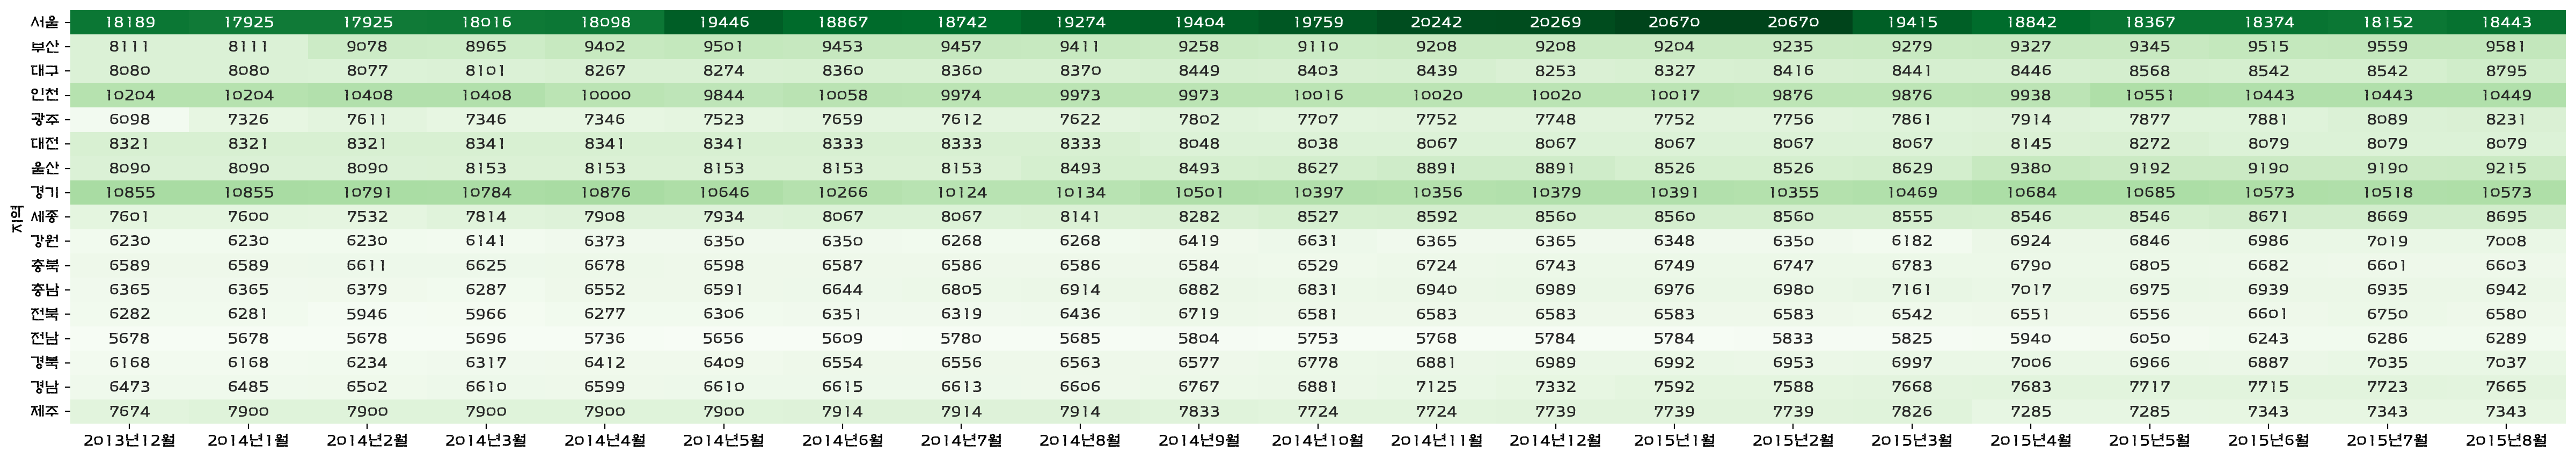

In [7]:
df_first.head()
plt.figure(figsize=(30, 5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.show()

# 2번

In [8]:
%ls "c:/ai_x/download/shareData/부동산_250213/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 c:\ai_x\download\shareData\부동산_250213 디렉터리

2025-05-08  오후 12:55    <DIR>          .
2025-05-08  오후 12:55    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 04:55           412,540 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
2025-05-08  오후 12:55            47,200 최종전국평당분양가격(결측치제외).csv
               3개 파일             461,903 바이트
               2개 디렉터리  143,331,631,104 바이트 남음


In [9]:
df_first = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
df_first.shape

(9095, 5)

In [10]:
def commadrop(row):
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price): # np.nan이거나 None인지 여부
        row['평당분양가격'] = np.nan
    elif price.strip() == '': # space면 np.nan로
        row['평당분양가격'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        # row['분양가격(제곱미터)'] = price.replace(',','')
        row['평당분양가격'] = ''.join(price.split(','))
    else:
        row['평당분양가격'] = price
    return row
    
commadrop(df_first.loc[1]) # 그대로

지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)             5652
평당분양가격                 5652
Name: 1, dtype: object

In [11]:
%%time
df_first = df_first.apply(commadrop, axis=1)
df_first.head()

CPU times: total: 4.72 s
Wall time: 4.74 s


,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879


In [12]:
df_first['평당분양가격'] = df_first['평당분양가격'].astype(np.float64)

In [13]:
df_first['평당분양가격'] = df_first['평당분양가격']*3.3
df_first.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841",19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,19400.7


In [14]:
df_first.drop(['분양가격(제곱미터)'], axis=1, inplace=True)
df_first.head()

,지역명,규모구분,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,19400.7


In [15]:
df_first.to_csv('data/df_first.csv', index=False) # 전처리 단계 백업

# 3번

In [16]:
%ls "c:/ai_x/download/shareData/부동산_250213/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 c:\ai_x\download\shareData\부동산_250213 디렉터리

2025-05-08  오후 12:55    <DIR>          .
2025-05-08  오후 12:55    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 04:55           412,540 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
2025-05-08  오후 12:55            47,200 최종전국평당분양가격(결측치제외).csv
               3개 파일             461,903 바이트
               2개 디렉터리  143,331,753,984 바이트 남음


In [17]:
df_last = df_first.copy()
grouped_by_region = df_last.groupby('지역명')['평당분양가격'].mean()
print(grouped_by_region)

지역명
강원    10078.717400
경기    15420.030280
경남    10776.955814
경북    10261.553425
광주    12998.216000
대구    14434.520000
대전    12829.565060
부산    14896.949156
서울    27755.404554
세종    10741.830807
울산    13958.197975
인천    14513.232203
전남     9224.326627
전북     8886.201923
제주    15912.434624
충남     9769.541279
충북     8896.583302
Name: 평당분양가격, dtype: float64


In [18]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


In [19]:
df_last.pivot_table(index=['연도','지역명'],
                   values='평당분양가격',
                   ).unstack()

r = df_last.pivot_table(index='연도',
                   columns='지역명',
                   values='평당분양가격',
                   #aggfunc='mean'
                   )
r

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


# 4번

In [20]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

<Axes: xlabel='연도', ylabel='평당분양가격'>

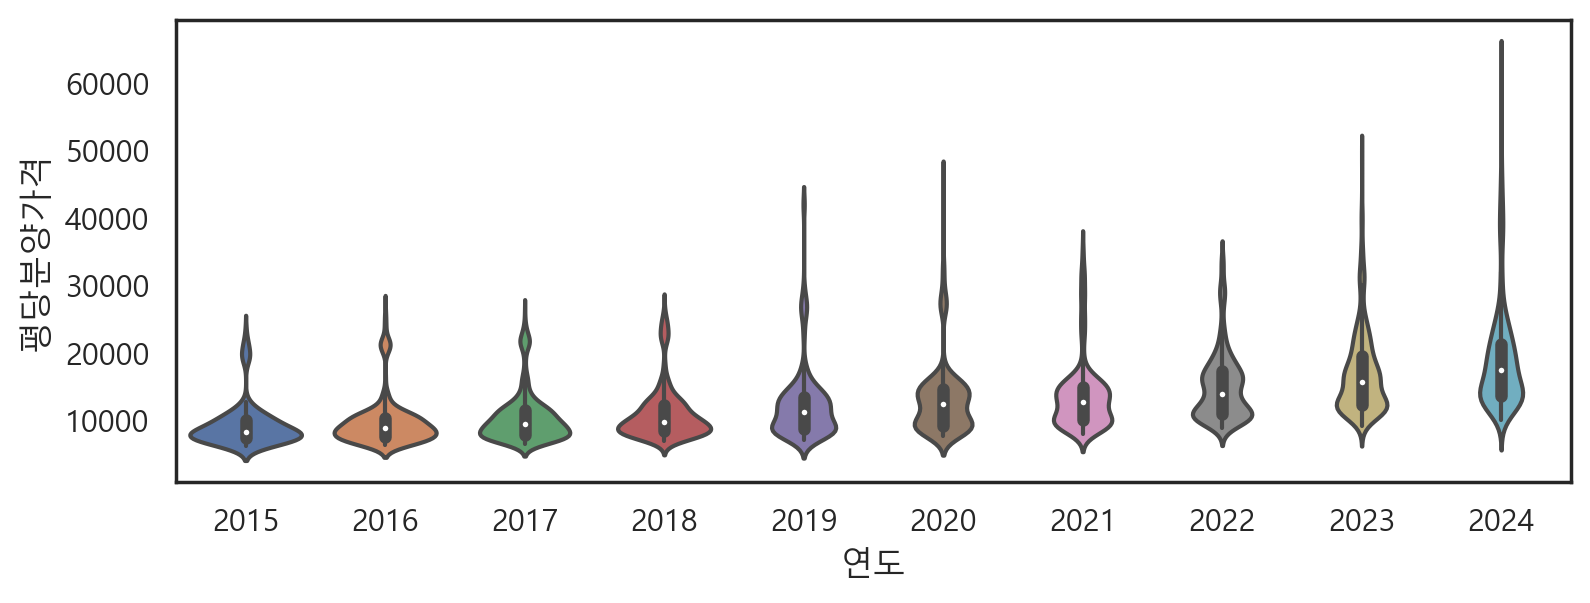

In [21]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

# 5번

In [22]:
df_first = pd.read_csv('c:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289


In [23]:
new_first = df_first.melt(id_vars='지역',
             var_name='연도월',
             value_name='평당분양가격')
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [24]:
new_first['연도월'].str.split('년')[0]

['2013', '12월']

In [25]:
def parse_year(data):
    return int(data.split('년')[0])
parse_year("2013년12월")

2013

In [26]:
def parse_month(data):
    return int(data.split('년')[1][:-1])
parse_month('2013년12월')

12

In [27]:
new_first['연도'] = new_first['연도월'].map(lambda data : int(data.split('년')[0]))
new_first.head(1)

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [28]:
new_first['월']=new_first['연도월'].apply(lambda data : int(data.split('년')[1][:-1]))
new_first.head(1)

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [29]:
new_first.drop('연도월', axis=1, inplace=True)
new_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [30]:
new_first.columns = ['지역명','평당분양가격','연도','월']
new_first.tail(1) # new_first concat 준비 완료

,지역명,평당분양가격,연도,월
356,제주,7343,2015,8


In [31]:
new_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [32]:
new_first[['월', '연도']] = new_first[['연도', '월']]
new_first.head(1)

,지역명,평당분양가격,연도,월
0,서울,18189,12,2013


In [33]:
new_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,12,2013
1,부산,8111,12,2013
2,대구,8080,12,2013
3,인천,10204,12,2013
4,광주,6098,12,2013


In [39]:
df_last = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
df_last.sample()

,지역명,규모구분,연도,월,분양가격(제곱미터)
8409,경남,전용면적 102제곱미터초과,2023,12,4396
